# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:

!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly


     |████████████████████████████████| 10.1 MB 7.3 MB/s 
     |████████████████████████████████| 296 kB 55.6 MB/s 
     |████████████████████████████████| 207 kB 59.6 MB/s 
     |████████████████████████████████| 296 kB 42.3 MB/s 
     |████████████████████████████████| 280 kB 48.2 MB/s 
     |████████████████████████████████| 280 kB 50.0 MB/s 
     |████████████████████████████████| 280 kB 48.2 MB/s 
     |████████████████████████████████| 280 kB 48.7 MB/s 
     |████████████████████████████████| 279 kB 46.3 MB/s 
     |████████████████████████████████| 279 kB 46.3 MB/s 
     |████████████████████████████████| 272 kB 44.5 MB/s 
     |████████████████████████████████| 272 kB 48.6 MB/s 
     |████████████████████████████████| 272 kB 51.3 MB/s 
     |████████████████████████████████| 270 kB 49.5 MB/s 
     |████████████████████████████████| 270 kB 46.9 MB/s 
     |████████████████████████████████| 270 kB 49.0 MB/s 
     |████████████████████████████████| 248 kB 46.5 MB/s 
     |████████

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152,170604,171246,171422,171519,171673,171857,171931,172205,172441,172716,172901,173047
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551,268008,268304,268491,268940,269301,269601,269904,270164,270370,270455,270734,270947
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226,261752,262165,262570,262994,263369,263685,263936,264054,264201,264365,264488,264603
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140,37140,37277,37361,37452,37522,37589,37589,37589,37589,37820,37901,37958
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514,98514,98514,98555,98568,98585,98605,98617,98638,98658,98671,98698,98701


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7379,7381,7383,7386,7386,7390,7390,7393,7393,7397,7401,7403,7403,7405,7408,7414,7417,7418,7420,7420,7425,7432,7442,7454,7465,7477,7478,7488,7494,7501,7504,7513,7524,7526,7534,7539,7549,7569,7574,7578
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3269,3271,3277,3283,3286,3292,3297,3305,3305,3312,3317,3323,3329,3329,3334,3346,3346,3362,3362,3371,3371,3380,3387,3393,3399,3402,3402,3407,3410,3414,3420,3423,3430,3432,3433,3438,3445,3451,3453,3457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6412,6423,6435,6443,6453,6468,6481,6495,6508,6516,6526,6539,6545,6555,6566,6579,6593,6604,6618,6631,6640,6646,6654,6667,6678,6690,6703,6715,6729,6744,6753,6762,6772,6780,6787,6797,6805,6812,6816,6820
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,142,142,142,142,144,144,144,144,144,145,145,145,145,145,145,145,145,146,147,147,147,147,147,147,148,148,148,148,148,149,150,150,150,150,150,150,150,151,151,151
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1863,1866,1870,1877,1881,1884,1886,1888,1888,1891,1892,1893,1893,1894,1895,1895,1895,1895,1896,1896,1896,1896,1896,1896,1896,1897,1898,1898,1898,1898,1899,1899,1899,1899,1899,1899,1899,1899,1899,1899


In [7]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [8]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/15/22', '2/16/22', '2/17/22', '2/18/22', '2/19/22', '2/20/22',
       '2/21/22', '2/22/22', '2/23/22', '2/24/22'],
      dtype='object', length=769)

In [9]:
# confirmed_check tất cả data trừ 4 cột đầu tiên
confirmed_check = confirmed_df.loc[:, cols[4]:]
# tính sum() của tất cả các cột trong confirmed_check nếu hàng nào bằng không thì kiểm tra xem có phải từ hàng đó là các data không được cập nhật => sum() các cột sẽ bằng không
a = confirmed_check.sum(axis=0)
b = []
# chạy vòng lặp cho từng cột trong confirmed_check
for i in range(len(a)):
    if a[i]==0:
        b.append(i)
print(b)
# vi b không có giá trị nào => ngày nào cũng có giá trị được update

[]


In [10]:
deaths_check = deaths_df.loc[:, cols[4]:]
c = deaths_check.sum(axis=0)
d = []
for i in range(len(c)):
    if c[i]==0:
        d.append(i)
print(d)
# vi d không có giá trị nào => ngày nào cũng có giá trị được update

[]


In [11]:

# tính tổng số ca hồi phục theo ngày của 3 bảng để check ngày update
recoveries_check = recoveries_df.loc[:, cols[4]:]
e = recoveries_check.sum(axis=0)
f = []
for i in range(len(e)):
    if e[i]==0:
        f.append(i)
print(f)
# vi f có giá trị index i từ 561 vậy từ i=561 sẽ ngừng update => cột thứ 561+4 = 565 trong recoveries_df là ngừng update => cắt 3 dataframe theo giá trị 565

[561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760,

In [12]:
# tao bang du lieu mới dùng cho phân tích sau này, đó là confirmed, deaths, recoveries  chỉ chứa data
confirmed = confirmed_df.loc[:,cols[4]:cols[564]]
deaths = deaths_df.loc[:,cols[4]:cols[564]]
recoveries = recoveries_df.loc[:,cols[4]:cols[564]]
# tính sum() tất cả các cột sau đó lấy cột cuối cùng là tổng cập nhật cuối cùng của bảng dữ liệu
total_cases = confirmed.sum()
total_deaths = deaths.sum()
total_recoveries = recoveries.sum()
total_active = total_cases-total_deaths-total_recoveries
# The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recoveries[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200746486
Total death cases:  4257055
Total recoveries cases:  130899061
Total active cases:  65590370


In [13]:
# lấy các ngày theo tên các cột để dùng phân tích sau này
dates = confirmed.keys()
mortality_rate = []
recovery_rate = [] 
#chuyển index từ ngày sang index stt 0-560 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])
#Insert your code here:
adjusted_dates


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

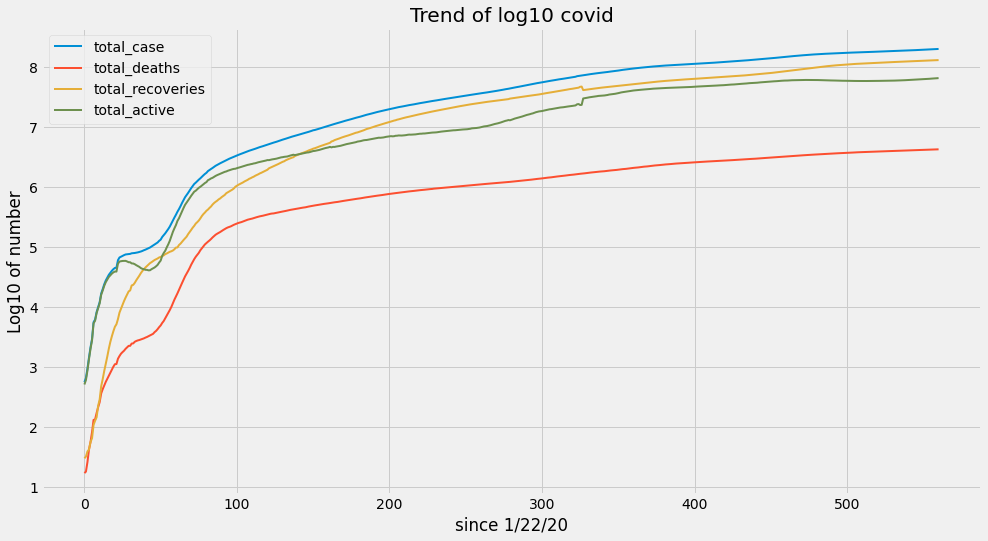

In [15]:
#Insert your code here:
# chuyển đổi data về log10
line1 = np.log10(np.array(total_cases))
line2 = np.log10(np.array(total_deaths))

line3 = np.log10(np.array(total_recoveries))
line4 = np.log10(np.array(total_active))

data = pd.DataFrame({'total_case':line1,'total_deaths':line2,'total_recoveries':line3,'total_active':line4},index=adjusted_dates)
data.plot.line(figsize=(15,8),linewidth=2)
plt.xlabel('since 1/22/20')
plt.ylabel('Log10 of number')
plt.title('Trend of log10 covid')
plt.show()

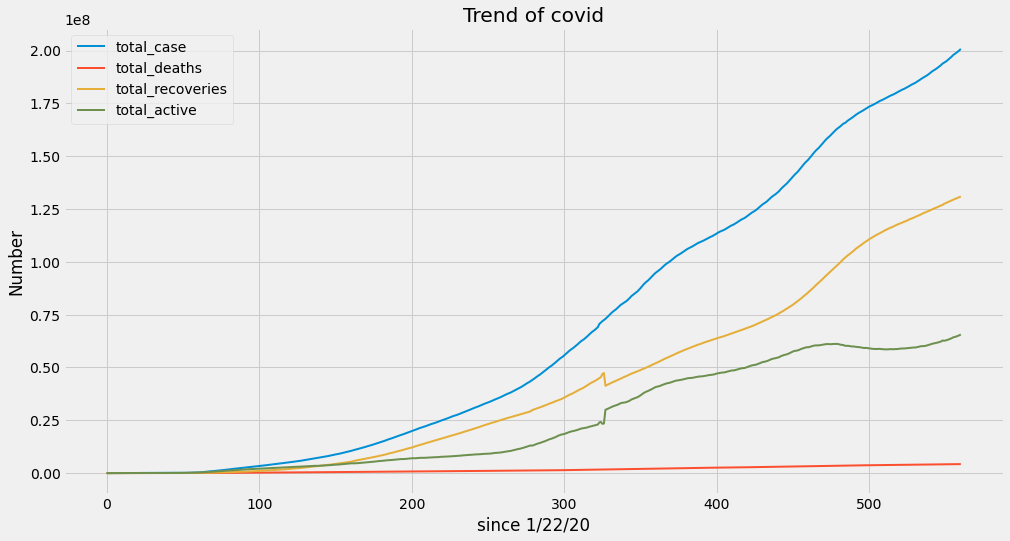

In [16]:
# vẽ biểu đồ theo số lượng tổng
line1 = np.array(total_cases)
line2 = np.array(total_deaths)

line3 = np.array(total_recoveries)
line4 = np.array(total_active)

data = pd.DataFrame({'total_case':line1,'total_deaths':line2,'total_recoveries':line3,'total_active':line4},index=adjusted_dates)
data.plot.line(figsize=(15,8),linewidth=2)
plt.xlabel('since 1/22/20')
plt.ylabel('Number')
plt.title('Trend of covid')
plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

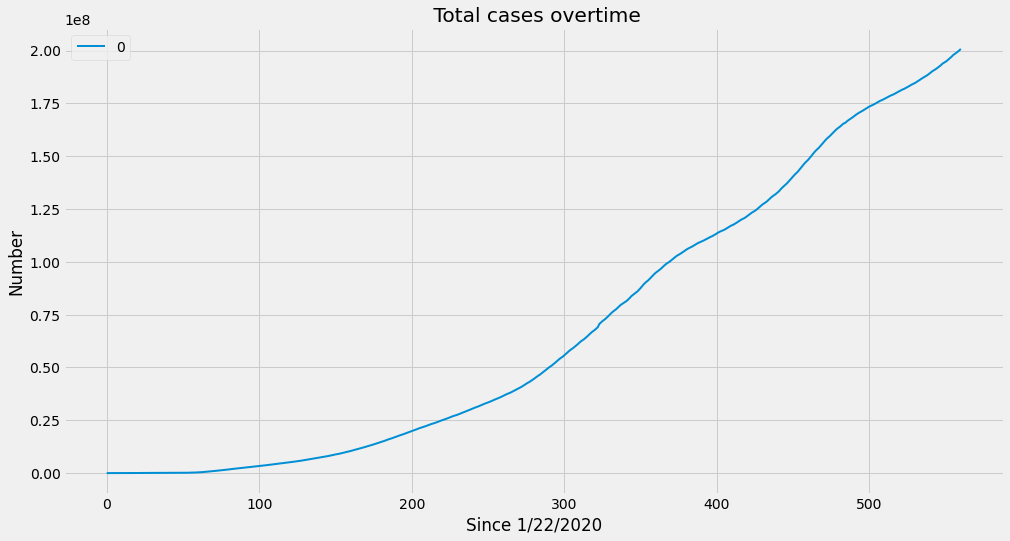

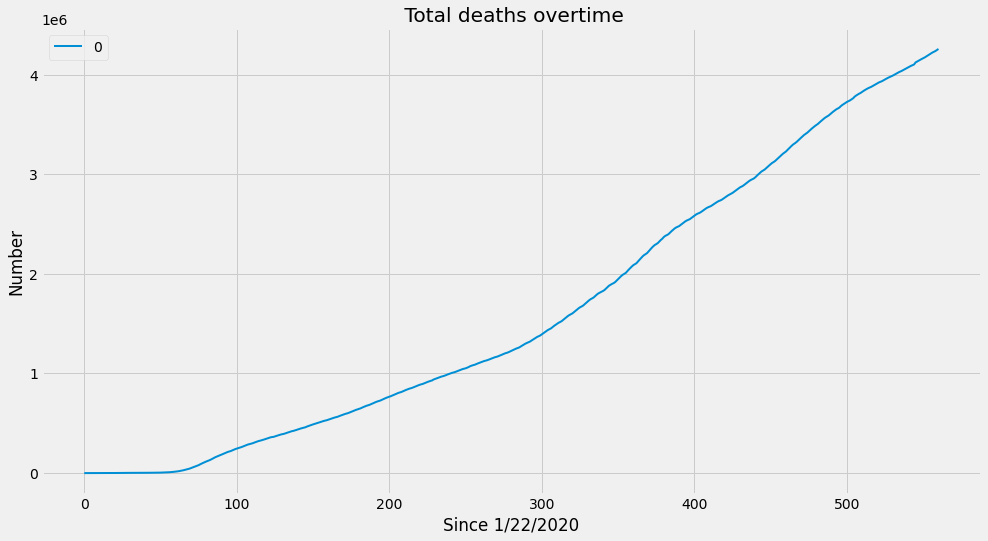

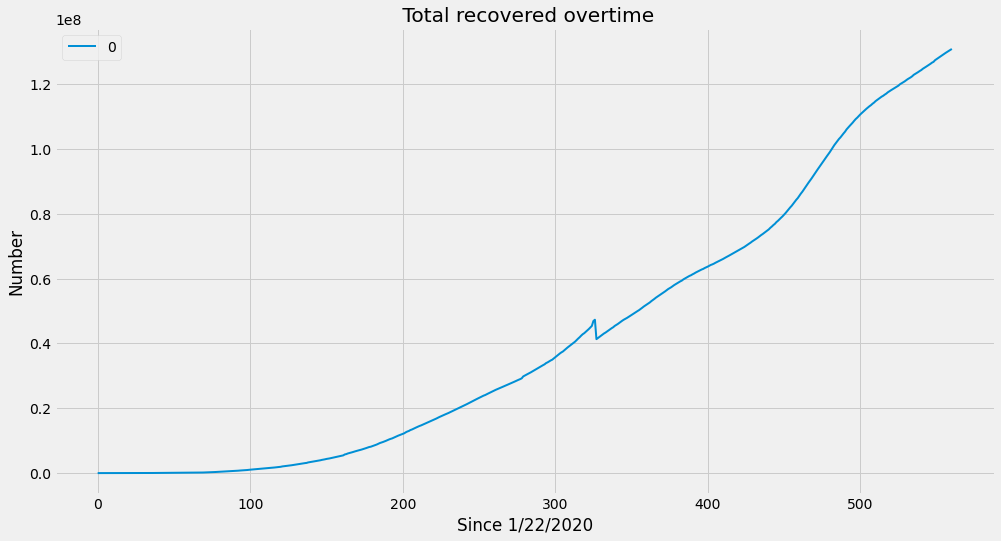

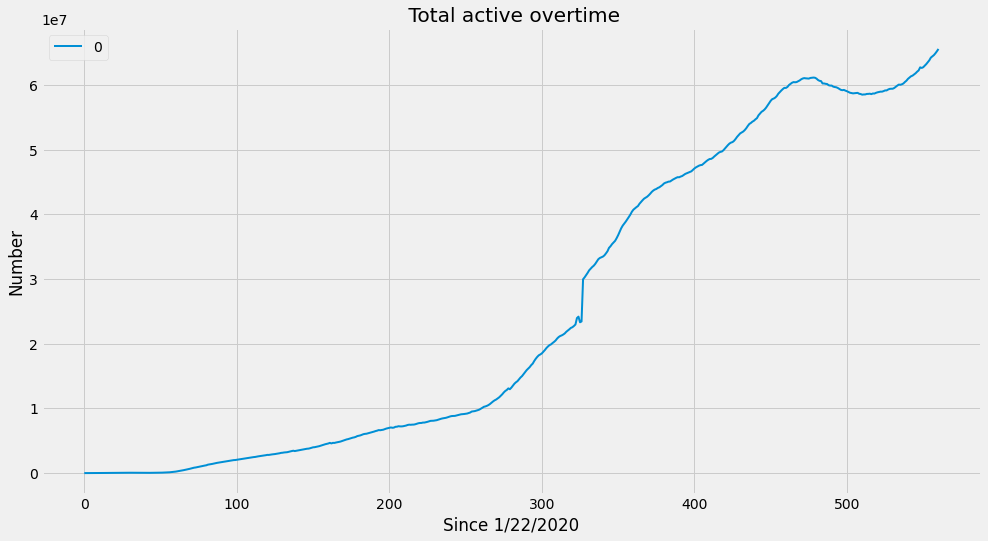

In [17]:
#Insert your code here:
# tạo các dataframe mới với index là ngày đã chỉnh sửa (theo số từ 1 đến ....)
line1 = pd.DataFrame(np.array(total_cases),index=adjusted_dates)
line2 = pd.DataFrame(np.array(total_deaths),index=adjusted_dates)
line3 = pd.DataFrame(np.array(total_recoveries),index=adjusted_dates)
line4 = pd.DataFrame(np.array(total_active),index=adjusted_dates)

line1.plot.line(figsize=(15,8),linewidth=2)
plt.xlabel('Since 1/22/2020')
plt.ylabel('Number')
plt.title(' Total cases overtime')
line2.plot.line(figsize=(15,8),linewidth=2)
plt.xlabel('Since 1/22/2020')
plt.ylabel('Number')
plt.title(' Total deaths overtime')
line3.plot.line(figsize=(15,8),linewidth=2)
plt.xlabel('Since 1/22/2020')
plt.ylabel('Number')
plt.title(' Total recovered overtime')
line4.plot.line(figsize=(15,8),linewidth=2)
plt.xlabel('Since 1/22/2020')
plt.ylabel('Number')
plt.title(' Total active overtime')

plt.show()


## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [18]:
#Insert your code here:
# tạo các biến để lưu data
daily_cases = []
daily_deaths = []
daily_recoveries = []
daily_active = []
# dùng vong lặp for để tính toán data của ngày hôm sau trừ ngày hôm trước
# chạy từ i==1 => để và i-1==0, chạy từ 1 đến 561+1==562 nhưng chúng a chỉ chạy i đến 560 vì không có data 562 để tính daily cho data 561.
for i in range(1,len(adjusted_dates)+1):
    if i<561:
        daily_cases.append(confirmed.sum().values[i] - confirmed.sum().values[i-1])
        daily_deaths.append(deaths.sum().values[i] - deaths.sum().values[i-1])
        daily_recoveries.append(recoveries.sum().values[i] - recoveries.sum().values[i-1])
        daily_active.append(total_active.values[i] - total_active.values[i-1])
    else:
        break


print('Daily case:    ',daily_cases)
print('Daily deaths:  ',daily_deaths)
print('Daily crecover:',daily_recoveries)
print('Daily active:  ',daily_active )

Daily case:     [98, 286, 493, 684, 809, 2651, 589, 2068, 1692, 2111, 4749, 3100, 4011, 3745, 3162, 3594, 2731, 3031, 2608, 2043, 418, 15152, 6528, 2143, 2183, 2035, 1882, 500, 560, 629, 1761, 381, 568, 854, 977, 1359, 1389, 1896, 2376, 1980, 2601, 2306, 2818, 3914, 4104, 3937, 4183, 4829, 7693, 5875, 14315, 11056, 11288, 14810, 16012, 19579, 27120, 30922, 32114, 35148, 42673, 41094, 51105, 62831, 64965, 69639, 56887, 65237, 76869, 82235, 82860, 84071, 58617, 70402, 73991, 69188, 83343, 86510, 85347, 74025, 119113, 71102, 83836, 77990, 94213, 87775, 76671, 76523, 75885, 75605, 81309, 83358, 83881, 83084, 70892, 71061, 75627, 77211, 83258, 88820, 79129, 74454, 77191, 79771, 90553, 88649, 90738, 84222, 75203, 76343, 84922, 84327, 95264, 96163, 94170, 77978, 89157, 96576, 104956, 105891, 107569, 104053, 93196, 87976, 92895, 102585, 119826, 121544, 134934, 102315, 99490, 124423, 111147, 138237, 133617, 129832, 111148, 103252, 126287, 136766, 135209, 127954, 133651, 132093, 124747, 144548, 

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

In [19]:
#Insert your code here: 
#vi daily tinh ngay sau tru ngay truoc len các daily sẽ bị trừ đi 1 index còn 560 cột.
adjusted_dates5 = list(np.array([i for i in range(len(dates)-1)]).reshape(-1, 1)[:, 0])
adjusted_dates5

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Text(0.5, 1.0, 'daily active increase')

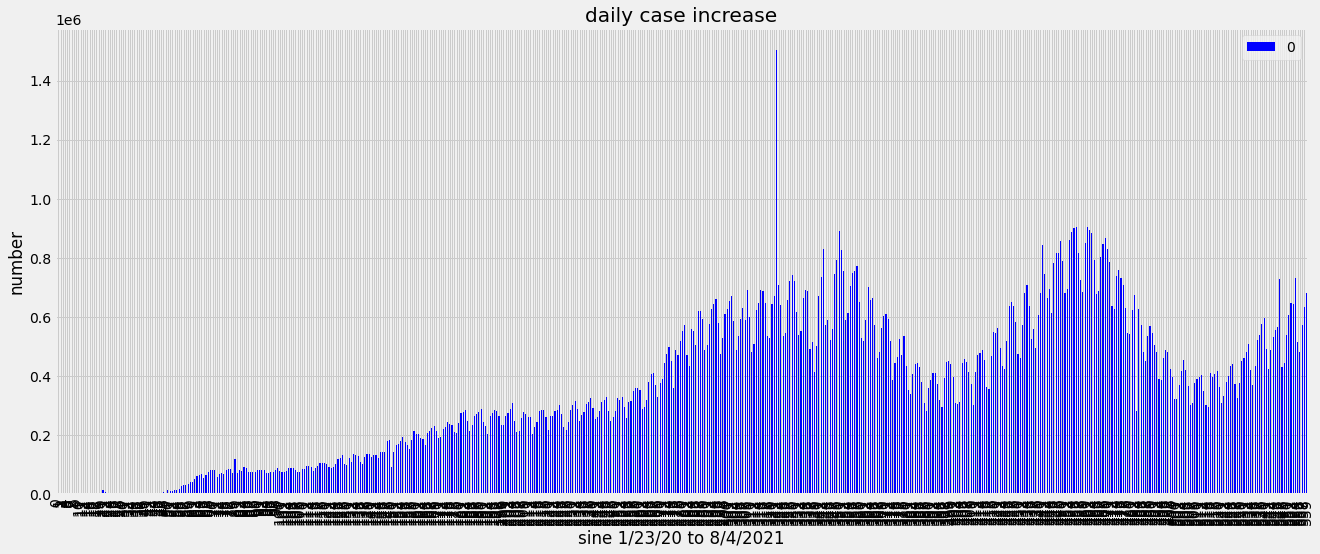

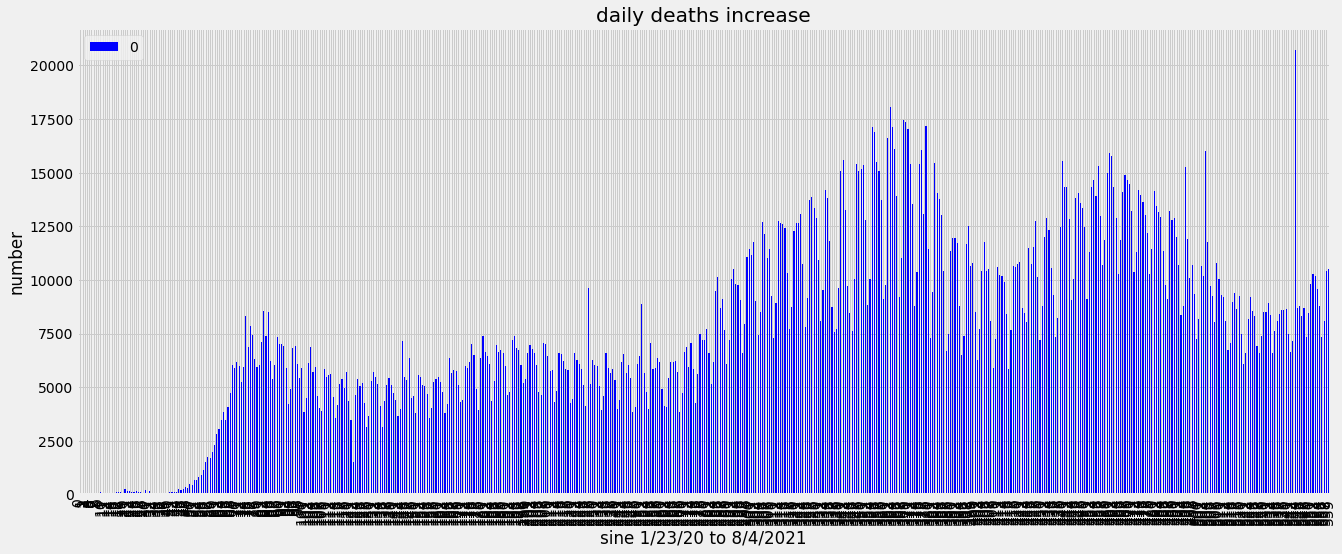

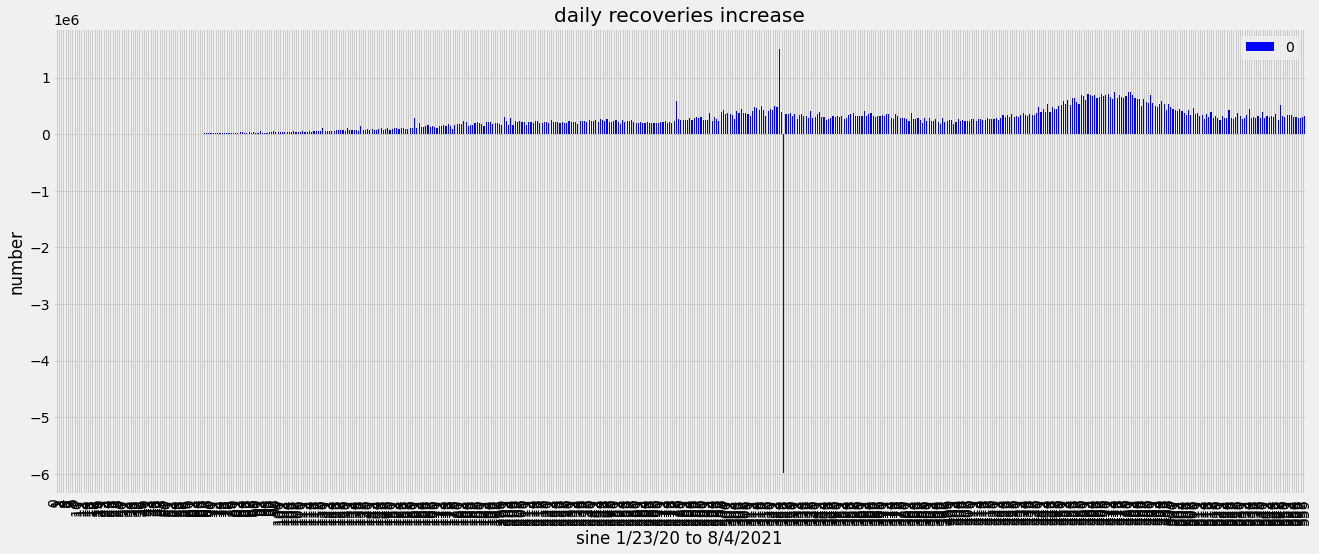

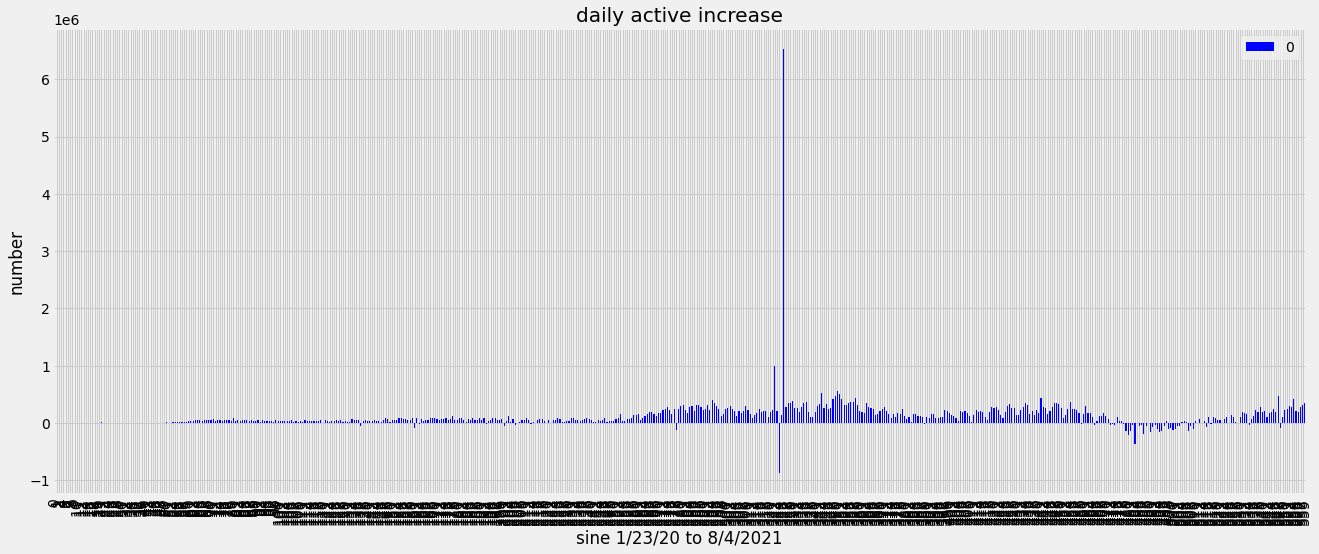

In [20]:
daily_cases5 = pd.DataFrame(daily_cases,index=adjusted_dates5)
daily_cases5.plot(kind='bar',figsize=(20,8),color='blue')
plt.xlabel('sine 1/23/20 to 8/4/2021')
plt.ylabel('number')
plt.title('daily case increase')
# chart daily deaths
daily_deaths5 = pd.DataFrame(daily_deaths,index=adjusted_dates5)
daily_deaths5.plot(kind='bar',figsize=(20,8),color='blue')
plt.xlabel('sine 1/23/20 to 8/4/2021')
plt.ylabel('number')
plt.title('daily deaths increase')
# chart daily recover
daily_recoveries_5 = pd.DataFrame(daily_recoveries,index=adjusted_dates5)
daily_recoveries_5.plot(kind='bar',figsize=(20,8),color='blue')
plt.xlabel('sine 1/23/20 to 8/4/2021')
plt.ylabel('number')
plt.title('daily recoveries increase')
#chart daily active
daily_active5 = pd.DataFrame(daily_active,index=adjusted_dates5)
daily_active5.plot(kind='bar',figsize=(20,8),color='blue')
plt.xlabel('sine 1/23/20 to 8/4/2021')
plt.ylabel('number')
plt.title('daily active increase')

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [21]:
#Insert your code here:
mortality_rate = total_deaths*100/total_cases
recovery_rate = total_recoveries*100/total_cases
mortality_rate, recovery_rate


(1/22/20    3.052065
 1/23/20    2.748092
 1/24/20    2.763018
 1/25/20    2.928870
 1/26/20    2.644004
              ...   
 7/31/21    2.127603
 8/1/21     2.126145
 8/2/21     2.124093
 8/3/21     2.122573
 8/4/21     2.120612
 Length: 561, dtype: float64, 1/22/20     5.385996
 1/23/20     4.885496
 1/24/20     4.144527
 1/25/20     2.928870
 1/26/20     2.644004
              ...    
 7/31/21    65.382723
 8/1/21     65.369608
 8/2/21     65.324066
 8/3/21     65.269372
 8/4/21     65.206153
 Length: 561, dtype: float64)

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Unrecognized location 'upper reight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



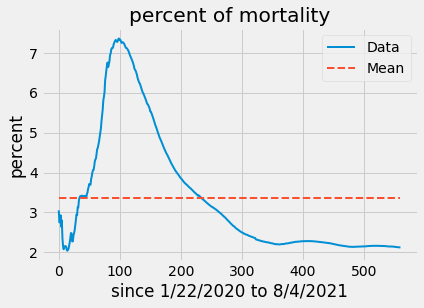

In [22]:
#Insert your code here:
y = mortality_rate
x = adjusted_dates
# tính y_mean bằng cách tính y mean rồi nhân với len(adjusted_dates) để tạo 1 list với len(y_mean) = len(adjusted_dates) để vẽ đường thẳng trung bình
y_mean = [mortality_rate.sum()/len(mortality_rate)]*len(adjusted_dates)
fig,ax = plt.subplots()
data_line = ax.plot(x,y,label = 'Data',linewidth=2,)
# vẽ đường thẳng mean_data
mean_data = ax.plot(x,y_mean,label = 'Mean',linewidth=2,linestyle='--')
plt.xlabel('since 1/22/2020 to 8/4/2021')
plt.ylabel('percent')
plt.title('percent of mortality')
plt.legend(loc='upper reight')

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

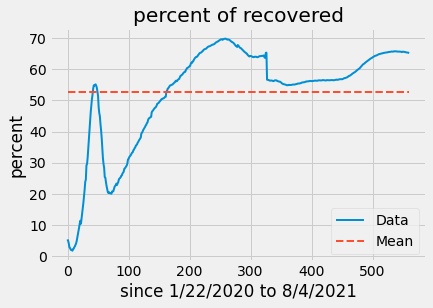

In [23]:
#Insert your code here:
y = recovery_rate
x = adjusted_dates
# tính ra 1 mean * vs các chỉ mục để ra 1 list mean
y_mean = [recovery_rate.sum()/len(recovery_rate)]*len(adjusted_dates)
fig,ax = plt.subplots()
data_line = ax.plot(x,y,label = 'Data',linewidth=2,)
mean_data = ax.plot(x,y_mean,label = 'Mean',linewidth=2,linestyle='--')
plt.xlabel('since 1/22/2020 to 8/4/2021')
plt.ylabel('percent')
plt.title('percent of recovered')
plt.legend(loc='lower right')

#  5. Continent Analysis

## Data Prerocessing

In [24]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
# lấy tất cả tên các quốc gia theo 3 bảng ban đầu
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
# tạo 1 dict các châu lục
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
# hàm trả về 
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [25]:
# phân tích data theo châu lục  sẽ lấy data gồm cột đầu đến cột thứ 564 của bảng ban đầu.
confirmed_8 = confirmed_df.loc[:,:cols[564]]
deaths_8 = deaths_df.loc[:,:cols[564]]
recoveries_8 = recoveries_df.loc[:,:cols[564]]

In [30]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China',

In [26]:
#Insert your code here:
# tạo 1 list để lưu các châu lục
continents_confirm = []
continents_deaths = []
continents_recorveries = []


# add continent into confirm_df
for i in range(countries.shape[0]):
    confirmed_country_code = country_to_continent_code(countries[i]) # trả về mã code theo alpha 2 của từng nước theo hàm contry_to_contient
    continents_confirm.append(continents[confirmed_country_code])
continents_confirm_df = pd.DataFrame(continents_confirm,columns=['continent'])
new_confirmed_df = pd.concat([confirmed_8, continents_confirm_df], axis=1)


# add continent into deaths_df
for i in range(countries1.shape[0]):  
    deaths_country_code = country_to_continent_code(countries1[i])
    continents_deaths.append(continents[deaths_country_code])
continents_deaths_df = pd.DataFrame(continents_deaths,columns=['continent'])
new_deaths_df = pd.concat([deaths_8, continents_deaths_df], axis=1)

# add continent into recorveries_df
for i in range(countries2.shape[0]):      
    recorveries_country_code = country_to_continent_code(countries2[i])
    continents_recorveries.append(continents[recorveries_country_code])
continents_recorveries_df = pd.DataFrame(continents_recorveries,columns=['continent'])
new_recoveries_df = pd.concat([recoveries_8, continents_recorveries_df], axis=1)

In [27]:
#Insert your code here:
# sắp xếp lại các cột 
# lấy tên các cột
cols1 = new_confirmed_df.columns.to_list()
# set tên các cột theo vị trí mong muốn
cols12 = cols1[:4] + cols1[-1:] + cols1[4:-1]
# đtặ tên cho các bảng data mới
new_confirmed_df = new_confirmed_df[cols12]
new_deaths_df = new_deaths_df[cols12]
new_recoveries_df = new_recoveries_df[cols12]

In [29]:
cols1

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [28]:
new_confirmed_df

,Province/State,Country/Region,Lat,Long,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,Asia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,...,113124,114220,115751,117158,118659,120216,122156,123485,124748,125937,127464,129021,130113,131586,132777,133578,134653,135889,136643,137853,139051,140224,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.153300,20.168300,Europe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.033900,1.659600,Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.506300,1.521800,Europe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.202700,17.873900,Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404
280,NaN,Winter Olympics 2022,39.904200,116.407400,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
281,NaN,Yemen,15.552727,48.516388,Asia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096
282,NaN,Zambia,-13.133897,27.849332,Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,17240

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [31]:
# group 2 cột đó là cột châu lục và quóc gia ( đưa 2 cột vào list), as_index = False không chọn index nào
confirmed_groupby_country = new_confirmed_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
# set lại index theo quốc gia
confirmed_groupby_country = confirmed_groupby_country.set_index(['Country/Region'])
# tính tổng theo châu lục, quốc gia là các hàng của cột cuối cùng được cập nhật
total_confirmed_groupby_country = confirmed_groupby_country.iloc[:,-1]
# set lại tên
total_confirmed_groupby_country = total_confirmed_groupby_country.rename('Confirmed')
# tạo dataframe mới
total_confirmed_groupby_country = pd.DataFrame(total_confirmed_groupby_country)

# calculate total Deaths
deaths_groupby_country = new_deaths_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
deaths_groupby_country = deaths_groupby_country.set_index(['Country/Region'])
total_deaths_groupby_country = deaths_groupby_country.iloc[:,-1]
total_deaths_groupby_country = total_deaths_groupby_country.rename('Deaths')
total_deaths_groupby_country = pd.DataFrame(total_deaths_groupby_country)

# calculate total Recoveries
recoveries_groupby_country = new_recoveries_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
recoveries_groupby_country = recoveries_groupby_country.set_index(['Country/Region'])
total_recoveries_groupby_country = recoveries_groupby_country.iloc[:,-1]
total_recoveries_groupby_country = total_recoveries_groupby_country.rename('Recoveries')
total_recoveries_groupby_country = pd.DataFrame(total_recoveries_groupby_country)

# calculate total Active
total_active_groupby_country = total_confirmed_groupby_country.iloc[:,0] - total_deaths_groupby_country.iloc[:,0] - total_recoveries_groupby_country.iloc[:,0]
total_active_groupby_country = pd.DataFrame(total_active_groupby_country.rename('Active'))

# merge total confirmed, Deaths, Recoveries Active into countries_df
# nhóm thanh 1 datafame mới
# lấy cột quốc gia theo quốc gia của deaths_groupby_country
countries_df_groupby_country = deaths_groupby_country.iloc[:,0]
# tạo 1 dataframe mới gồm tên các quốc gia + số ng mắc + số ng chết + số ng hồi phục + số ng mắc trong ngày
countries_df_groupby_country = pd.concat([countries_df_groupby_country, total_confirmed_groupby_country.iloc[:,0], total_deaths_groupby_country.iloc[:,0], total_recoveries_groupby_country.iloc[:,0], total_active_groupby_country.iloc[:,0]], axis = 1)

#  calculate Mortality Rate and merge into countries_df
# tạo 1 cột mới 
countries_df_groupby_country['Mortality Rate'] = np.round(countries_df_groupby_country.iloc[:,2] * 100 / countries_df_groupby_country.iloc[:,1],2)
countries_df_groupby_country

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,148933,6836,82586,59511,4.59
Albania,Europe,133310,2457,130314,539,1.84
Algeria,Africa,176724,4404,118409,53911,2.49
Andorra,Europe,14797,128,14380,289,0.87
Angola,Africa,43158,1026,39582,2550,2.38
...,...,...,...,...,...,...
West Bank and Gaza,Others,317404,3609,312320,1475,1.14
Winter Olympics 2022,Others,0,0,0,0,NaN
Yemen,Asia,7096,1380,4251,1465,19.45


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [32]:
#Insert your code here:
# group by theo cột châu lục với index = cột châu lục

confirmed_groupby_continent = new_confirmed_df.groupby(['continent']).sum()
total_confirmed_groupby_continent = confirmed_groupby_continent.iloc[:,-1]
total_confirmed_groupby_continent = total_confirmed_groupby_continent.rename('Confirmed')
total_confirmed_groupby_continent = pd.DataFrame(total_confirmed_groupby_continent)

# calculate total Deaths
deaths_groupby_continent = new_deaths_df.groupby(['continent']).sum()
total_deaths_groupby_continent = deaths_groupby_continent.iloc[:,-1]
total_deaths_groupby_continent = total_deaths_groupby_continent.rename('Deaths')
total_deaths_groupby_continent = pd.DataFrame(total_deaths_groupby_continent)

# calculate total Recoveries
recoveries_groupby_continent = new_recoveries_df.groupby(['continent']).sum()
total_recoveries_groupby_continent = recoveries_groupby_continent.iloc[:,-1]
total_recoveries_groupby_continent = total_recoveries_groupby_continent.rename('Recoveries')
total_recoveries_groupby_continent = pd.DataFrame(total_recoveries_groupby_continent)

# calculate total Active
total_active_groupby_continent = total_confirmed_groupby_continent.iloc[:,0] - total_deaths_groupby_continent.iloc[:,0] - total_recoveries_groupby_continent.iloc[:,0]
total_active_groupby_continent = pd.DataFrame(total_active_groupby_continent.rename('Active'))

# merge total confirmed, Deaths, Recoveries Active into countries_df
countries_df_groupby_continent = pd.concat([total_confirmed_groupby_continent.iloc[:,0], total_deaths_groupby_continent.iloc[:,0], total_recoveries_groupby_continent.iloc[:,0], total_active_groupby_continent.iloc[:,0]], axis = 1)
countries_df_groupby_continent

#  calculate Mortality Rate and merge into countries_df
countries_df_groupby_continent['Mortality Rate'] = np.round(countries_df_groupby_continent.iloc[:,1] * 100 / countries_df_groupby_continent.iloc[:,0],2)
countries_df_groupby_continent

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62526305,902857,57853343,3770105,1.44
Australia,90000,1423,55290,33287,1.58
Europe,52458248,1137862,27947075,23373311,2.17
North America,42340579,927932,5776939,35635708,2.19
Others,753558,16614,654615,82329,2.20
South America,35722194,1096367,32656668,1969159,3.07


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [33]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [34]:
continents


{'AF': 'Africa',
 'AS': 'Asia',
 'EU': 'Europe',
 'NA': 'North America',
 'OC': 'Australia',
 'SA': 'South America',
 'na': 'Others'}

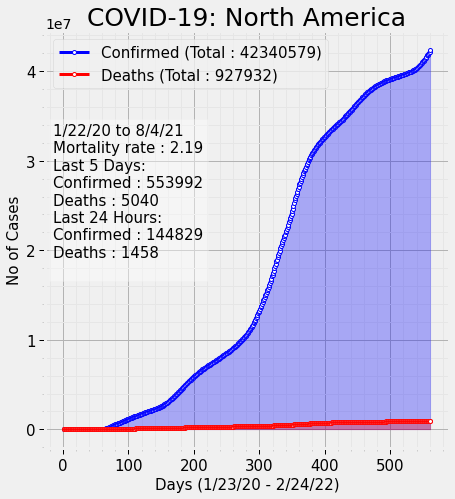

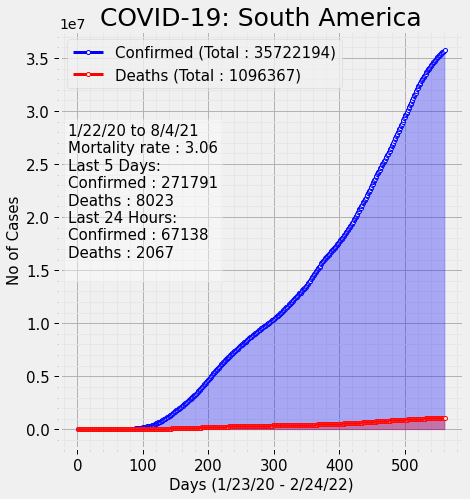

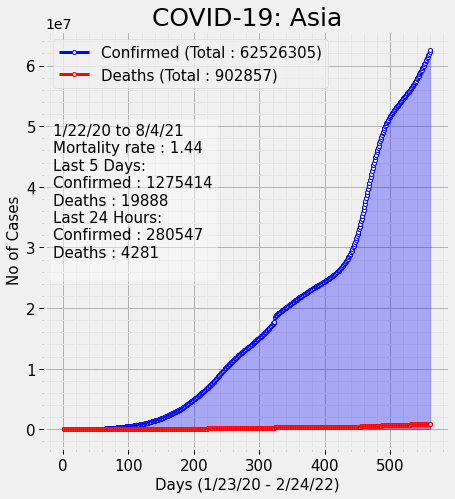

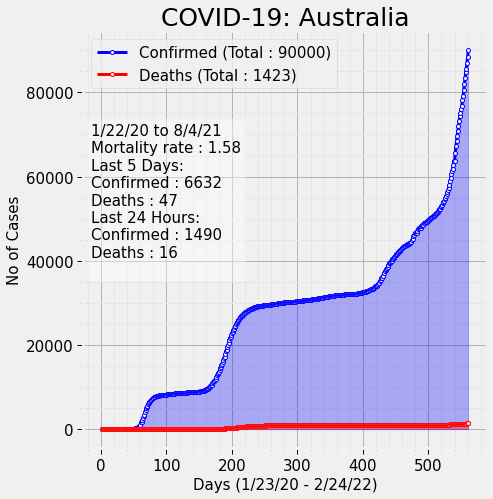

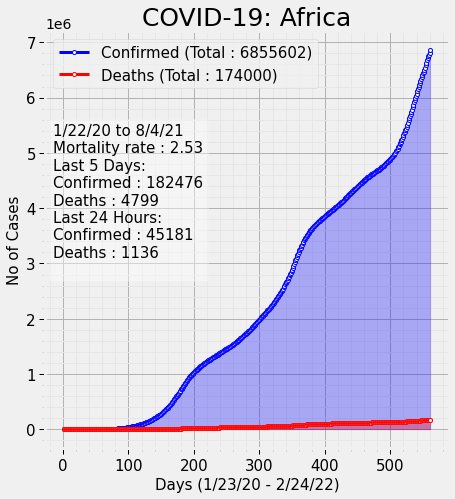

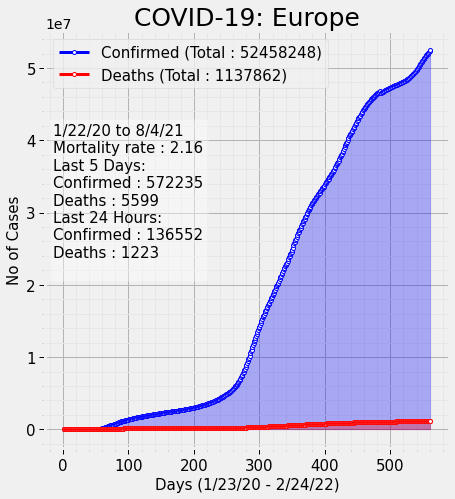

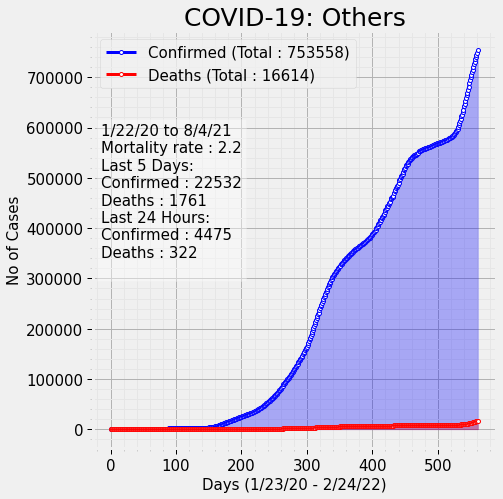

In [35]:
# chạy vòng lặp cho 7 châu lục
for key in continents:
    visualize_covid_cases(new_confirmed_df, new_deaths_df, continents[key])


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [36]:
# sửa code cho 7 ngày
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,7:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,7:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,7:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,7:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,7:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,7:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,7:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,7:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        

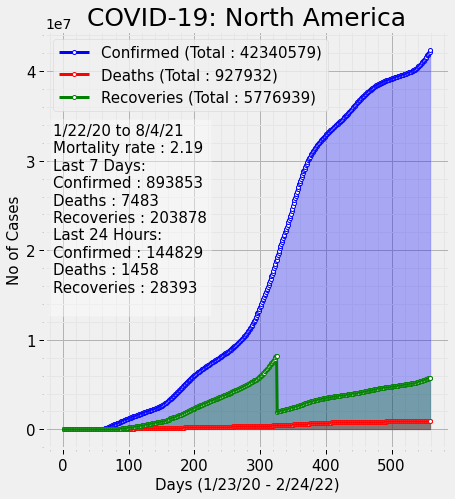

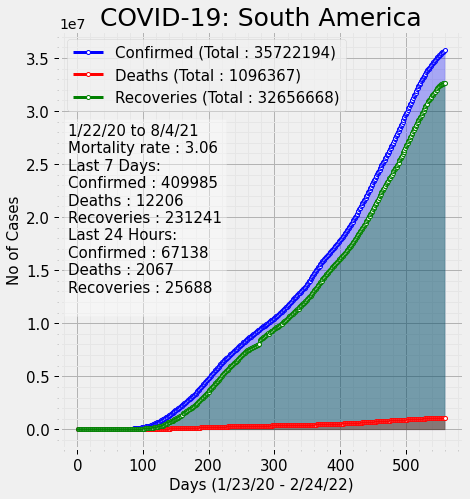

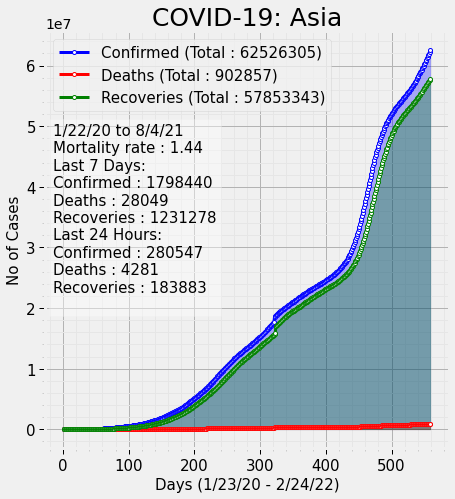

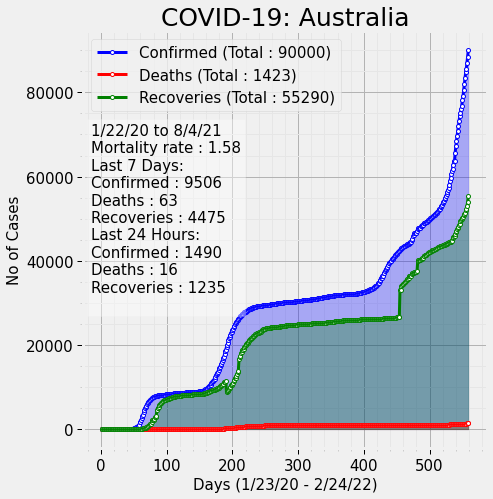

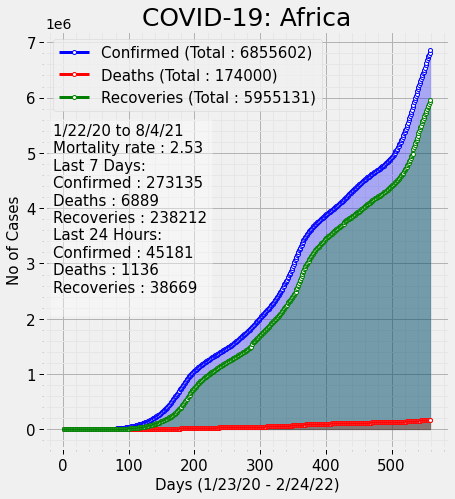

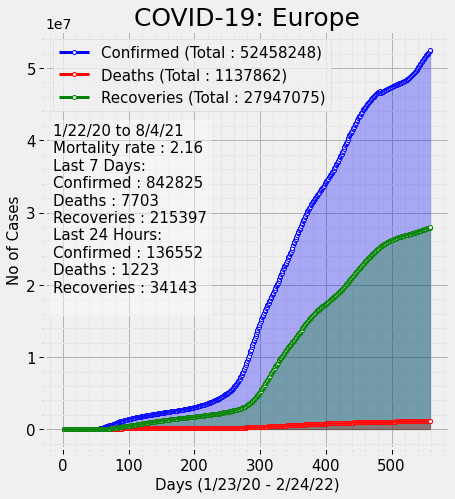

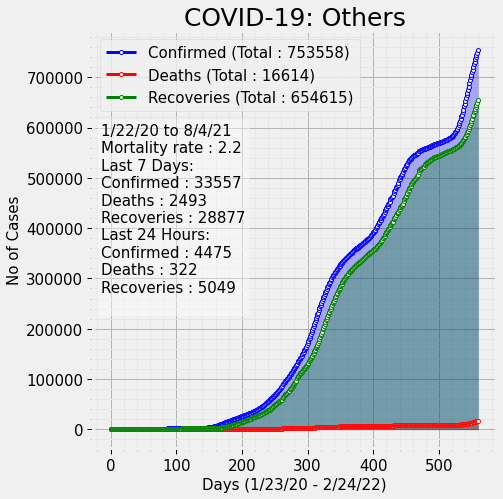

In [37]:
for key in continents:
    visualize_covid_cases_7(new_confirmed_df, new_deaths_df,new_recoveries_df, continents[key])

# Problem 12
    Visualize the covariance matrix for continents_df.

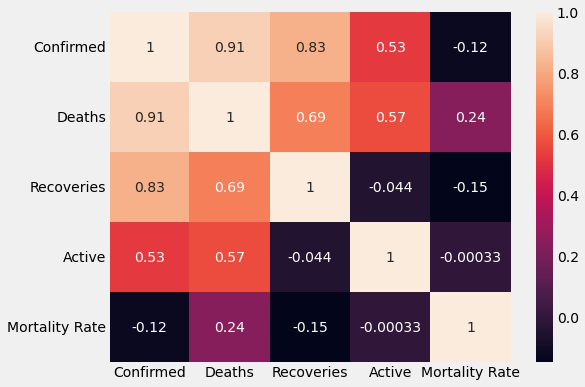

In [38]:
#Insert your code here:
f, ax = plt.subplots(figsize=(8, 6))
corr = countries_df_groupby_continent.corr()
sns.heatmap(corr, annot=True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

In [39]:
countries_df_groupby_continent

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62526305,902857,57853343,3770105,1.44
Australia,90000,1423,55290,33287,1.58
Europe,52458248,1137862,27947075,23373311,2.17
North America,42340579,927932,5776939,35635708,2.19
Others,753558,16614,654615,82329,2.20
South America,35722194,1096367,32656668,1969159,3.07


In [40]:
countries_df_groupby_continent.columns[0:4]

Index(['Confirmed', 'Deaths', 'Recoveries', 'Active'], dtype='object')

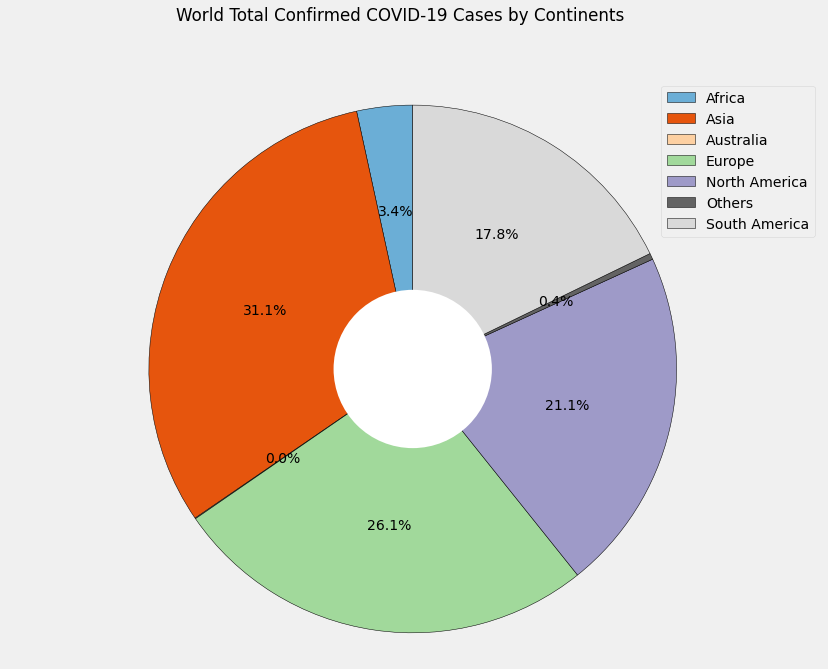

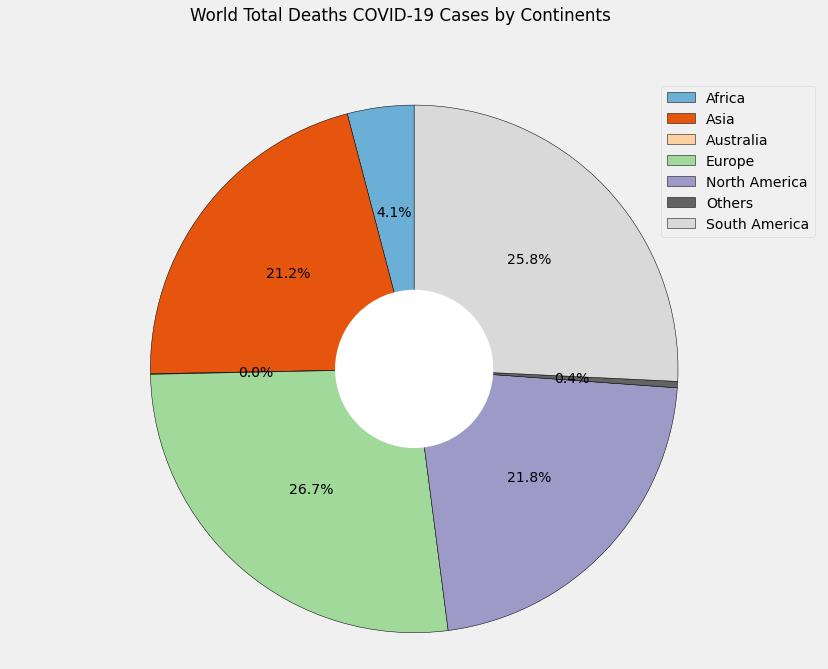

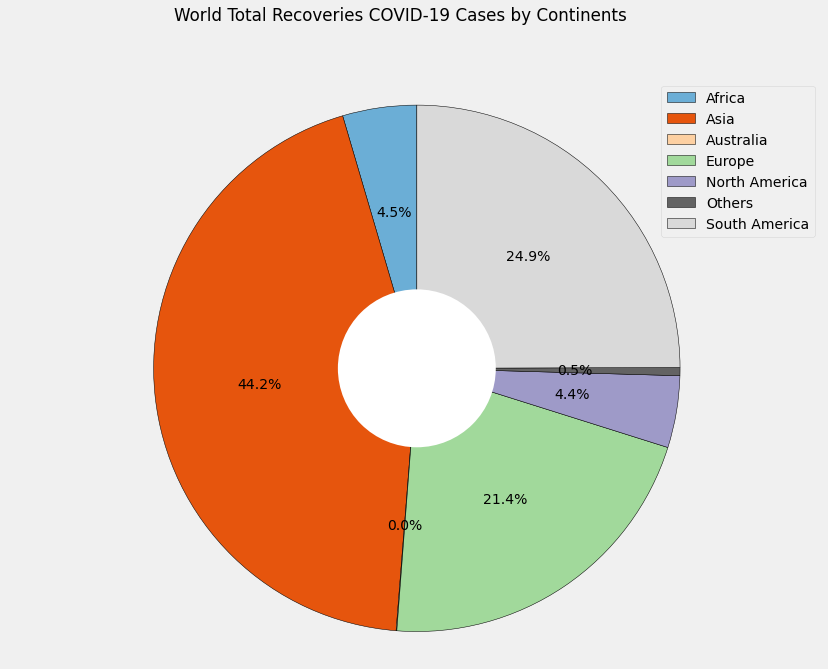

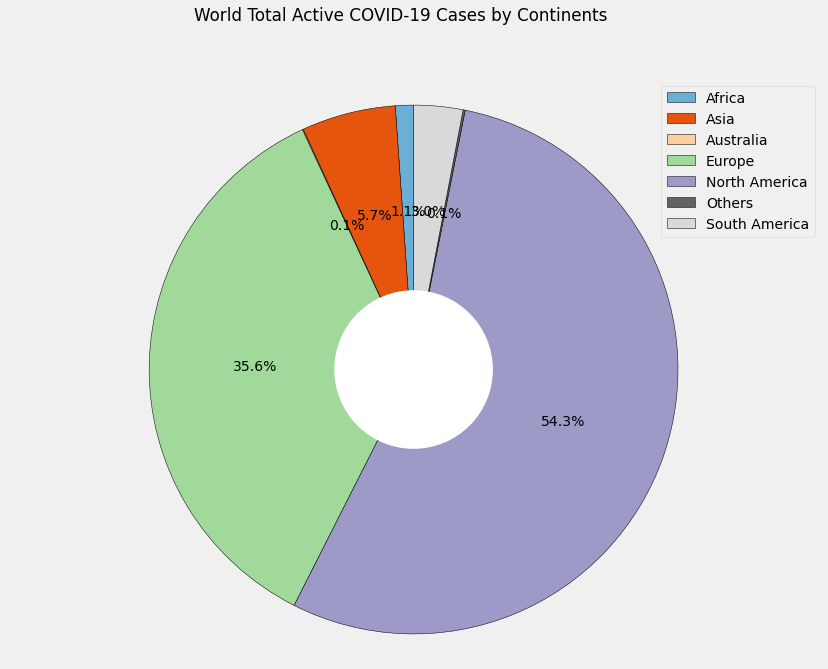

In [41]:
# lấy tên của 4 cột confirmed, deaths, recoveries, active
columns = countries_df_groupby_continent.columns[0:4]
cmap = plt.get_cmap("tab20c")
colorss = cmap(np.array([1, 4, 7, 10, 13, 16 , 19 ]))
for i in range(len(columns)):
    fig, ax = plt.subplots(figsize=(13, 10))
# lấy data theo từng cột của 7 châu lục với màu theo colorss, labels không, hiển thị số % autopct, starangle=90 bắt đầu quay từ góc 90 độ, 
    ax.pie(countries_df_groupby_continent[columns[i]], colors = colorss, labels=None, autopct='%1.1f%%', startangle=90,  wedgeprops={"edgecolor":"k"})
# tâm của biểu đồ hình tròn màu trắng
    centre_circle = plt.Circle((0,0),0.3,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    title = 'World Total ' + columns[i] + ' COVID-19 Cases by Continents'
    fig.suptitle(title)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')
    plt.legend(countries_df_groupby_continent.index, loc="upper right")

plt.show()

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [42]:
location_mean_df = confirmed_df.groupby(['Country/Region']).mean()
countries_location_groupby_country_df = pd.concat([countries_df_groupby_country.iloc[:,:], location_mean_df.iloc[:,0:2]], axis = 1)
countries_location_groupby_country_df

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
Country/Region,,,,,,,,
Afghanistan,Asia,148933,6836,82586,59511,4.59,33.939110,67.709953
Albania,Europe,133310,2457,130314,539,1.84,41.153300,20.168300
Algeria,Africa,176724,4404,118409,53911,2.49,28.033900,1.659600
Andorra,Europe,14797,128,14380,289,0.87,42.506300,1.521800
Angola,Africa,43158,1026,39582,2550,2.38,-11.202700,17.873900
...,...,...,...,...,...,...,...,...
West Bank and Gaza,Others,317404,3609,312320,1475,1.14,31.952200,35.233200
Winter Olympics 2022,Others,0,0,0,0,NaN,39.904200,116.407400
Yemen,Asia,7096,1380,4251,1465,19.45,15.552727,48.516388


In [43]:

m = folium.Map(tiles='CartoDB positron', zoom_start=2)
for i in range(countries_location_groupby_country_df.shape[0]):
    Confirm = countries_location_groupby_country_df.iloc[i,2]
    Deaths = countries_location_groupby_country_df.iloc[i,3]
    Recoverd = countries_location_groupby_country_df.iloc[i,4]
    Mortality_Rate = countries_location_groupby_country_df.iloc[i,6]
    

    folium.Circle(
        location= [countries_location_groupby_country_df.iloc[i,6], countries_location_groupby_country_df.iloc[i,7]],
        radius= float(Confirm),
        color='#FE9A2E',
        fill=True,
        fill_color='#FE9A2E'
    ).add_to(m)

m

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [44]:
import plotly.express as px
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm

In [45]:
cm.map_countries()

{'Afghanistan': {'alpha_2': 'AF', 'alpha_3': 'AFG', 'numeric': '004'},
 'Albania': {'alpha_2': 'AL', 'alpha_3': 'ALB', 'numeric': '008'},
 'Algeria': {'alpha_2': 'DZ', 'alpha_3': 'DZA', 'numeric': '012'},
 'American Samoa': {'alpha_2': 'AS', 'alpha_3': 'ASM', 'numeric': '016'},
 'Andorra': {'alpha_2': 'AD', 'alpha_3': 'AND', 'numeric': '020'},
 'Angola': {'alpha_2': 'AO', 'alpha_3': 'AGO', 'numeric': '024'},
 'Anguilla': {'alpha_2': 'AI', 'alpha_3': 'AIA', 'numeric': '660'},
 'Antarctica': {'alpha_2': 'AQ', 'alpha_3': 'ATA', 'numeric': '010'},
 'Antigua and Barbuda': {'alpha_2': 'AG', 'alpha_3': 'ATG', 'numeric': '028'},
 'Arab Republic of Egypt': {'alpha_2': 'EG',
  'alpha_3': 'EGY',
  'numeric': '818'},
 'Argentina': {'alpha_2': 'AR', 'alpha_3': 'ARG', 'numeric': '032'},
 'Argentine Republic': {'alpha_2': 'AR', 'alpha_3': 'ARG', 'numeric': '032'},
 'Armenia': {'alpha_2': 'AM', 'alpha_3': 'ARM', 'numeric': '051'},
 'Aruba': {'alpha_2': 'AW', 'alpha_3': 'ABW', 'numeric': '533'},
 'Aust

In [46]:
#Insert your code here:
countries_map_df = countries_location_groupby_country_df.reset_index()

# tao một dict chứa tên các nước, tên theo alpha 2-3, theo ký tự số
countries_all_dict_iso_code = cm.map_countries()

#list để lưu lại các ký tự viết tắt
countries_iso_code = []

#đổi tên
for i in range(countries_map_df.shape[0]):
# key loc hang va cot ten cua quoc gia
    key = countries_map_df.iloc[i,0]
    try:
        if key == 'Burma':
            countries_iso_code.append("BUR")
        elif key == 'Diamond Princess':
            countries_iso_code.append("NAN")
        elif key == 'Holy See':
            countries_iso_code.append("VAT")
        elif key == 'Kosovo':
            countries_iso_code.append("UNK")
        elif key == 'MS Zaandam':
            countries_iso_code.append("NAN")
        elif key == 'Timor-Leste':
            countries_iso_code.append("TLS")
        elif key == 'West Bank and Gaza':
            countries_iso_code.append("NAN")
        elif key == 'USA':
            countries_iso_code.append("USA")
        else:
            countries_iso_code.append(countries_all_dict_iso_code[key]["alpha_3"])
    except:
        print("errot: " + key)
#convert list countries_iso_code to dataframe 
countries_iso_code_df = pd.DataFrame(countries_iso_code, columns =['iso_alpha'])

#merge countries_iso_code_df to countries_map_df
countries_map_df = pd.concat([countries_map_df.iloc[:,:], countries_iso_code_df.iloc[:,0]],axis = 1)

#calculate the log 10 of the active column
color_df = np.log10(countries_map_df['Active'])

#rename log 10 of the active column to color name
color_df = color_df.to_frame('color')

#merge color_df to  countries_map_df
countries_map_df = pd.concat([countries_map_df, color_df], axis = 1)

# draw map
fig = px.choropleth(countries_map_df, locations="iso_alpha", color="color",hover_data = ["Active","Country/Region"], labels={'color':'Active Cases(log scale)'},hover_name="Country/Region", title="Active Cases Heat Map (Log Scale)",color_continuous_scale='Spectral')
fig.show()


errot: Summer Olympics 2020
errot: Winter Olympics 2022


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log10



# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [47]:
countries_location_groupby_country_df_top10 = countries_location_groupby_country_df.sort_values(by=['Confirmed'], inplace=False, ascending=False).iloc[0:10,:]
countries_location_groupby_country_df_top10

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
Country/Region,,,,,,,,
USA,North America,35451607,614648,0,34836959,1.73,40.000000,-100.000000
India,Asia,31812114,426290,30974748,411076,1.34,20.593684,78.962880
Brazil,South America,20034407,559944,17771228,1703235,2.79,-14.235000,-51.925300
Russia,Europe,6274006,159032,5609682,505292,2.53,61.524010,105.318756
France,Europe,6272466,112245,415111,5745110,1.79,6.425300,-9.839634
United Kingdom,Europe,5980830,130298,24693,5825839,2.18,25.767514,-35.857561
Turkey,Asia,5822487,51767,5478185,292535,0.89,38.963700,35.243300
Argentina,South America,4975616,106747,4615834,253035,2.15,-38.416100,-63.616700
Colombia,South America,4815063,121695,4615354,78014,2.53,4.570900,-74.297300


# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [48]:
countries_location_groupby_country_df_top10.reset_index()

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
0,USA,North America,35451607,614648,0,34836959,1.73,40.000000,-100.000000
1,India,Asia,31812114,426290,30974748,411076,1.34,20.593684,78.962880
2,Brazil,South America,20034407,559944,17771228,1703235,2.79,-14.235000,-51.925300
3,Russia,Europe,6274006,159032,5609682,505292,2.53,61.524010,105.318756
4,France,Europe,6272466,112245,415111,5745110,1.79,6.425300,-9.839634
5,United Kingdom,Europe,5980830,130298,24693,5825839,2.18,25.767514,-35.857561
6,Turkey,Asia,5822487,51767,5478185,292535,0.89,38.963700,35.243300
7,Argentina,South America,4975616,106747,4615834,253035,2.15,-38.416100,-63.616700
8,Colombia,South America,4815063,121695,4615354,78014,2.53,4.570900,-74.297300
9,Spain,Europe,4545184,81844,150376,4312964,1.80,40.463667,-3.749220


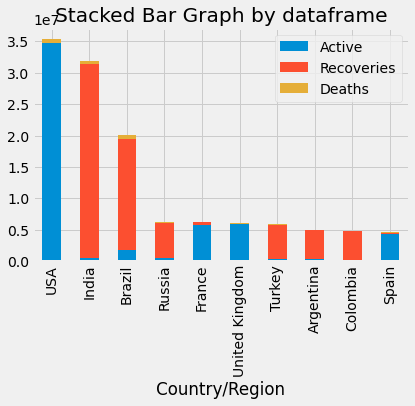

In [ ]:
stacke_bars = countries_location_groupby_country_df_top10.reset_index()
stacke_bars = stacke_bar[['Country/Region','Active','Recoveries','Deaths']]
stacke_bars.plot(x='Country/Region', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

Xu hướng cho đến thời điểm phân tích chưa cho thấy xu hướng giảm nên dịch covid vẫn chưa qua đỉnh

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?
Tỉ lệ tử vong cao nhất là ở South America với 55,69%

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?

Tỉ lệ lây lan nhah nhấ là ở Asia với 83,66%  
  
    19.3 Which continent has the highest recoveries rate over continents' dataset?

Châu lục có tỉ lệ hồi phục cao nhất là Asia với 92,53%

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [49]:
countries_df_groupby_continent["death_rate_over_active_cases"] = np.round(100 * countries_df_groupby_continent["Deaths"] / countries_df_groupby_continent["Active"],2)
countries_df_groupby_continent.sort_values(by=['death_rate_over_active_cases'], inplace=True, ascending=False)
countries_df_groupby_continent

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,death_rate_over_active_cases
continent,,,,,,
South America,35722194,1096367,32656668,1969159,3.07,55.68
Africa,6855602,174000,5955131,726471,2.54,23.95
Asia,62526305,902857,57853343,3770105,1.44,23.95
Others,753558,16614,654615,82329,2.20,20.18
Europe,52458248,1137862,27947075,23373311,2.17,4.87
Australia,90000,1423,55290,33287,1.58,4.27
North America,42340579,927932,5776939,35635708,2.19,2.60


In [50]:
#tính các ca trước 10 ngày
number_active_before_last_10day = new_confirmed_df.groupby(['continent']).sum() - new_recoveries_df.groupby(['continent']).sum() - new_deaths_df.groupby(['continent']).sum()
number_active_before_last_10day = pd.DataFrame(number_active_before_last_10day.iloc[:,-11])


# tính các ca sau 10 ngay qua
new_confirmed_last_10day = pd.DataFrame(new_confirmed_df.groupby(['continent']).sum().iloc[:,-1] - new_confirmed_df.groupby(['continent']).sum().iloc[:,-11], columns = ['new_confirmed_last_10day'])


#tính tốc độ lây lan của các châu lục
continents_spread_rate = pd.DataFrame(np.round(100 * new_confirmed_last_10day.iloc[:,0] / number_active_before_last_10day.iloc[:,0],2), columns = ['spread_rate'])
continents_spread_rate.sort_values(by=['spread_rate'], inplace=True, ascending=False)
continents_spread_rate

,spread_rate
continent,
Asia,83.77
Others,61.76
Africa,56.68
Australia,52.00
South America,34.99
Europe,5.54
North America,3.48


In [51]:
countries_df_groupby_continent['recoveries_rate'] = np.round(100 * countries_df_groupby_continent.iloc[:,2] / countries_df_groupby_continent.iloc[:,0],2)
countries_df_groupby_continent.sort_values(by=['recoveries_rate'], inplace=True, ascending=False)
countries_df_groupby_continent

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,death_rate_over_active_cases,recoveries_rate
continent,,,,,,,
Asia,62526305,902857,57853343,3770105,1.44,23.95,92.53
South America,35722194,1096367,32656668,1969159,3.07,55.68,91.42
Africa,6855602,174000,5955131,726471,2.54,23.95,86.87
Others,753558,16614,654615,82329,2.20,20.18,86.87
Australia,90000,1423,55290,33287,1.58,4.27,61.43
Europe,52458248,1137862,27947075,23373311,2.17,4.87,53.27
North America,42340579,927932,5776939,35635708,2.19,2.60,13.64


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?
Vanuatu

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
Kosovo

    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [52]:
countries_df_groupby_country.sort_values(by=["Mortality Rate"], inplace=True, ascending=False)
countries_df_groupby_country

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Vanuatu,Australia,4,1,3,0,25.00
MS Zaandam,Others,9,2,7,0,22.22
Yemen,Asia,7096,1380,4251,1465,19.45
Peru,South America,2119068,196673,2086086,-163691,9.28
Mexico,North America,2901094,242547,2270427,388120,8.36
...,...,...,...,...,...,...
Samoa,Australia,3,0,3,0,0.00
Antarctica,Others,0,0,0,0,NaN
Palau,Australia,0,0,0,0,NaN


In [53]:
number_active_before_last_10day = new_confirmed_df.groupby(['Country/Region']).sum() - new_recoveries_df.groupby(['Country/Region']).sum() - new_deaths_df.groupby(['Country/Region']).sum()
number_active_before_last_10day = pd.DataFrame(number_active_before_last_10day.iloc[:,-11])

#tính các ca sau 10 ngay qua
new_confirmed_last_10day = pd.DataFrame(new_confirmed_df.groupby(['Country/Region']).sum().iloc[:,-1] - new_confirmed_df.groupby(['Country/Region']).sum().iloc[:,-11], columns = ['new_confirmed_last_10day'])

#tính tốc độ lâu lan của các châu lục
continents_spread_rate = pd.DataFrame(np.round(100 * new_confirmed_last_10day.iloc[:,0] / number_active_before_last_10day.iloc[:,0],2), columns = ['spread_rate'])
continents_spread_rate.sort_values(by=['spread_rate'], inplace=True, ascending=False)
continents_spread_rate

,spread_rate
Country/Region,
Mongolia,741.16
Kosovo,526.75
San Marino,437.50
Burkina Faso,435.71
Antigua and Barbuda,387.50
...,...
Samoa,NaN
Solomon Islands,NaN
Tonga,NaN


In [54]:
countries_df_groupby_country['recoveries_rate'] = np.round(100 * countries_df_groupby_country.iloc[:,3] / countries_df_groupby_country.iloc[:,1],2)
countries_df_groupby_country.sort_values(by=['recoveries_rate'], inplace=True, ascending=False)
countries_df_groupby_country

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,recoveries_rate
Country/Region,,,,,,,
Samoa,Australia,3,0,3,0,0.0,100.0
Holy See,Others,27,0,27,0,0.0,100.0
Solomon Islands,Australia,20,0,20,0,0.0,100.0
Micronesia,Australia,1,0,1,0,0.0,100.0
Marshall Islands,Australia,4,0,4,0,0.0,100.0
...,...,...,...,...,...,...,...
Summer Olympics 2020,Others,299,0,0,299,0.0,0.0
Antarctica,Others,0,0,0,0,NaN,NaN
Palau,Australia,0,0,0,0,NaN,NaN


# Problem 21
**USA dataset**

In [55]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [56]:
us_medical_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,916.383942,663719.0,2914.0,2.241164,84000001,USA,13536.486998,6.493159
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,161.849237,123753.0,NaN,1.351351,84000002,USA,16916.662680,NaN
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,0.000000,696.0,NaN,NaN,16,ASM,1250.876152,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,1393.858286,873294.0,5188.0,1.802770,84000004,USA,8488.322873,5.113597
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,803.663856,344968.0,1575.0,1.203975,84000005,USA,11431.093603,6.494042
5,California,US,2020-07-07 04:34:13,36.1162,-119.6816,284324,6349,NaN,NaN,6,719.362208,4793353.0,NaN,2.233707,84000006,USA,12131.316935,NaN
6,Colorado,US,2020-07-07 04:34:13,39.0598,-105.3111,34257,1691,4603.0,27963.0,8,594.870124,355655.0,5565.0,4.936217,84000008,USA,6175.921244,16.252921
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,1317.593787,524364.0,10411.0,9.234503,84000009,USA,14707.483577,22.162381
8,Delaware,US,2020-07-07 04:34:13,39.3185,-75.5071,12293,572,6778.0,4943.0,10,1262.420874,127179.0,NaN,4.653055,84000010,USA,13060.556767,NaN
9,Diamond Princess,US,2020-07-07 04:34:13,NaN,NaN,49,0,NaN,NaN,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?
    Connecticut - 9.23%
    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    Massachusetts
    21.3 Which state has the highest recoveries rate over states' dataset?
    Minnsaota

In [57]:
#Insert your code here:
us_medical_data_sort = us_medical_data.sort_values(by=['Mortality_Rate'], inplace=False, ascending=False)
us_medical_data_sort

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,1317.593787,524364.0,10411.0,9.234503,84000009,USA,14707.483577,22.162381
34,New Jersey,US,2020-07-07 04:34:13,40.2989,-74.5210,174766,15229,30729.0,128808.0,34,1967.600333,1549209.0,20237.0,8.713937,84000034,USA,17441.745786,11.656519
26,Michigan,US,2020-07-07 04:34:13,43.3266,-84.5361,73267,6221,52841.0,14205.0,26,733.634215,1159363.0,NaN,8.490862,84000026,USA,11608.887561,NaN
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,397649,32057,71040.0,294552.0,36,2044.093624,4288131.0,89995.0,8.061632,84000036,USA,22042.910293,22.631768
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,110137,8198,93157.0,8782.0,25,1597.924586,899417.0,11469.0,7.443457,84000025,USA,13049.207233,10.413394
43,Pennsylvania,US,2020-07-07 04:34:13,40.5908,-77.2098,94439,6762,70437.0,17240.0,42,737.690057,1018320.0,NaN,7.160177,84000042,USA,6509.332261,NaN
33,New Hampshire,US,2020-07-07 04:34:13,43.4525,-71.5639,5914,382,4684.0,848.0,33,434.945367,125235.0,570.0,6.459249,84000033,USA,9210.413095,9.638147
39,Northern Mariana Islands,US,2020-07-07 04:34:13,15.0979,145.6739,31,2,19.0,10.0,69,56.216451,8218.0,NaN,6.451613,580,MNP,14902.799942,NaN
45,Rhode Island,US,2020-07-07 04:34:13,41.6809,-71.5118,16991,992,1657.0,14342.0,44,1603.891402,250954.0,2019.0,5.838385,84000044,USA,23689.186217,11.882761
18,Indiana,US,2020-07-07 04:34:13,39.8494,-86.2583,48524,2635,36788.0,9101.0,18,720.772750,526592.0,7285.0,5.430303,84000018,USA,7821.967764,15.013189


In [58]:
us_medical_data_sort["spread_rate"] = np.round(100 * us_medical_data_sort["Confirmed"] / us_medical_data_sort["Active"], 2)
us_medical_data_sort.sort_values(by=['spread_rate'], inplace=True, ascending=False)
us_medical_data_sort

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,spread_rate
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,110137,8198,93157.0,8782.0,25,1597.924586,899417.0,11469.0,7.443457,84000025,USA,13049.207233,10.413394,1254.12
27,Minnesota,US,2020-07-07 04:34:13,45.6945,-93.9002,38569,1511,33907.0,3151.0,27,683.892140,679693.0,4219.0,3.917654,84000027,USA,12052.080703,10.938837,1224.02
38,North Dakota,US,2020-07-07 04:34:13,47.5289,-99.7840,3849,80,3350.0,419.0,38,505.077015,113582.0,245.0,2.078462,84000038,USA,14904.561571,6.365290,918.62
47,South Dakota,US,2020-07-07 04:34:13,44.2998,-99.4388,7105,97,6063.0,945.0,46,803.134315,84303.0,692.0,1.365236,84000046,USA,9529.434505,9.739620,751.85
51,Vermont,US,2020-07-07 04:34:13,44.0459,-72.7107,1251,56,1022.0,173.0,50,200.484303,70353.0,NaN,4.476419,84000050,USA,11274.717984,NaN,723.12
33,New Hampshire,US,2020-07-07 04:34:13,43.4525,-71.5639,5914,382,4684.0,848.0,33,434.945367,125235.0,570.0,6.459249,84000033,USA,9210.413095,9.638147,697.41
23,Maine,US,2020-07-07 04:34:13,44.6939,-69.3819,3423,109,2787.0,527.0,23,254.647332,109550.0,359.0,3.184341,84000023,USA,8149.756140,10.487876,649.53
43,Pennsylvania,US,2020-07-07 04:34:13,40.5908,-77.2098,94439,6762,70437.0,17240.0,42,737.690057,1018320.0,NaN,7.160177,84000042,USA,6509.332261,NaN,547.79
19,Iowa,US,2020-07-07 04:34:13,42.0115,-93.2105,31758,723,25121.0,5914.0,19,1006.570377,335462.0,NaN,2.276592,84000019,USA,10632.474081,NaN,537.00
18,Indiana,US,2020-07-07 04:34:13,39.8494,-86.2583,48524,2635,36788.0,9101.0,18,720.772750,526592.0,7285.0,5.430303,84000018,USA,7821.967764,15.013189,533.17


In [59]:
us_medical_data_sort["recoveries_rate"] = np.round(100 * us_medical_data_sort["Recovered"] / us_medical_data_sort["Confirmed"], 2)
us_medical_data_sort.sort_values(by=['recoveries_rate'], inplace=True, ascending=False)
us_medical_data_sort

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,spread_rate,recoveries_rate
27,Minnesota,US,2020-07-07 04:34:13,45.6945,-93.9002,38569,1511,33907.0,3151.0,27,683.892140,679693.0,4219.0,3.917654,84000027,USA,12052.080703,10.938837,1224.02,87.91
38,North Dakota,US,2020-07-07 04:34:13,47.5289,-99.7840,3849,80,3350.0,419.0,38,505.077015,113582.0,245.0,2.078462,84000038,USA,14904.561571,6.365290,918.62,87.04
47,South Dakota,US,2020-07-07 04:34:13,44.2998,-99.4388,7105,97,6063.0,945.0,46,803.134315,84303.0,692.0,1.365236,84000046,USA,9529.434505,9.739620,751.85,85.33
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,110137,8198,93157.0,8782.0,25,1597.924586,899417.0,11469.0,7.443457,84000025,USA,13049.207233,10.413394,1254.12,84.58
51,Vermont,US,2020-07-07 04:34:13,44.0459,-72.7107,1251,56,1022.0,173.0,50,200.484303,70353.0,NaN,4.476419,84000050,USA,11274.717984,NaN,723.12,81.69
23,Maine,US,2020-07-07 04:34:13,44.6939,-69.3819,3423,109,2787.0,527.0,23,254.647332,109550.0,359.0,3.184341,84000023,USA,8149.756140,10.487876,649.53,81.42
33,New Hampshire,US,2020-07-07 04:34:13,43.4525,-71.5639,5914,382,4684.0,848.0,33,434.945367,125235.0,570.0,6.459249,84000033,USA,9210.413095,9.638147,697.41,79.20
19,Iowa,US,2020-07-07 04:34:13,42.0115,-93.2105,31758,723,25121.0,5914.0,19,1006.570377,335462.0,NaN,2.276592,84000019,USA,10632.474081,NaN,537.00,79.10
56,Wisconsin,US,2020-07-07 04:34:13,44.2685,-89.6165,32061,796,25242.0,6023.0,55,550.646001,624143.0,3602.0,2.482767,84000055,USA,10719.623443,11.234834,532.31,78.73
41,Oklahoma,US,2020-07-07 04:34:13,35.5653,-96.9289,16362,399,12432.0,3531.0,40,413.498102,365151.0,1689.0,2.438577,84000040,USA,9228.043370,10.322699,463.38,75.98


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

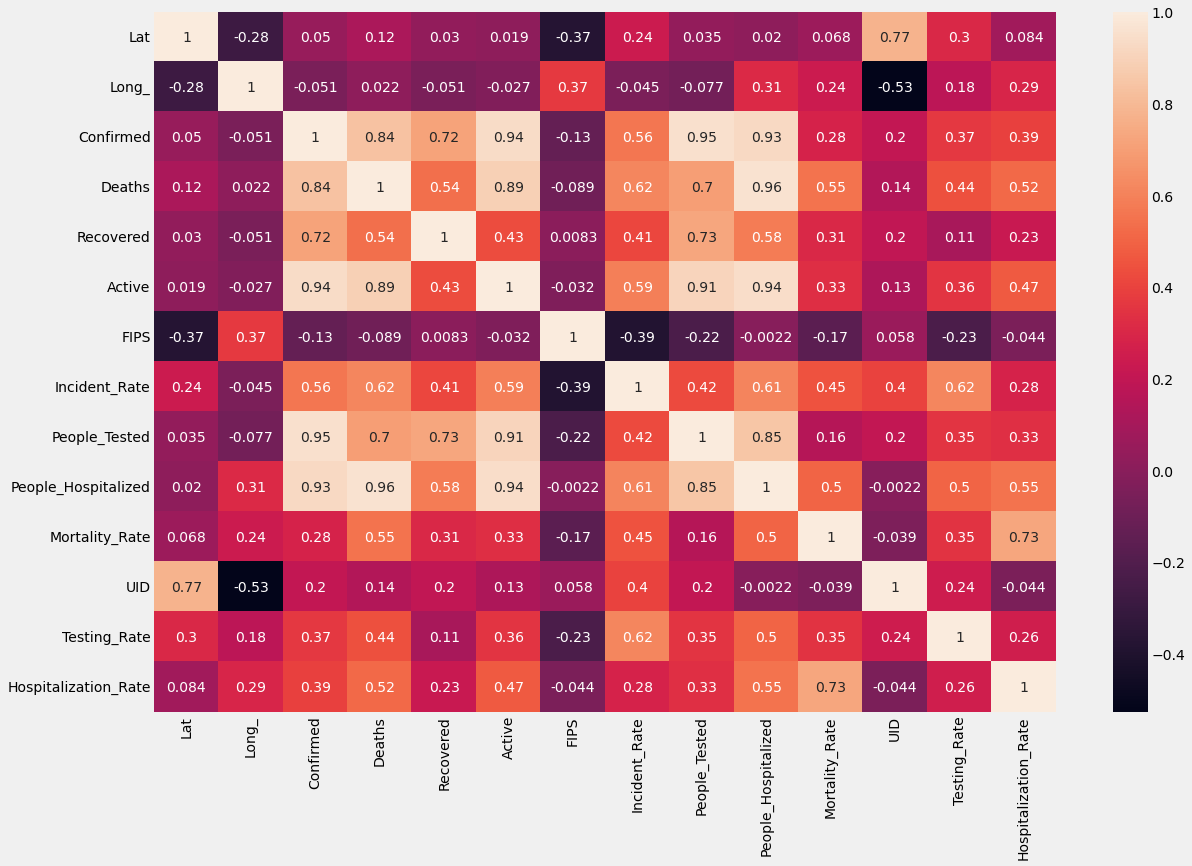

In [60]:
#Insert your code here:
f1, ax1 = plt.subplots(figsize=(18, 12))
corr1 = us_medical_data.corr()
sns.heatmap(corr1, annot=True)

In [61]:
X = us_medical_data.iloc[:,6:12]
X.drop(['FIPS'], axis=1, inplace=True)
for col in X.columns:
    print(col)

#Y_train
Y = us_medical_data_sort.iloc[:,5]

#handle missing values in X_train
for column in  X:
    mean_column = X[column].mean()
    X[column] = X[column].fillna(mean_column)

Deaths
Recovered
Active
Incident_Rate
People_Tested


In [62]:
from sklearn import linear_model
model = linear_model.LinearRegression()


#standardized
X_train = np.asanyarray(X)
Y_train = np.asanyarray(Y)

#fit
model.fit(X_train, Y_train)

LinearRegression()

In [63]:
print(X_train)
y_hat= model.predict(X_train)

y_hat_df  = pd.DataFrame(y_hat, columns = ['Confirmed_predict'])
y_hat_df

[[1.00700000e+03 2.20820000e+04 2.18430000e+04 9.16383942e+02
  6.63719000e+05]
 [1.60000000e+01 5.48000000e+02 6.20000000e+02 1.61849237e+02
  1.23753000e+05]
 [0.00000000e+00 1.92530833e+04 2.31985625e+04 0.00000000e+00
  6.96000000e+02]
 [1.82900000e+03 1.18360000e+04 8.77900000e+04 1.39385829e+03
  8.73294000e+05]
 [2.92000000e+02 1.78340000e+04 6.12700000e+03 8.03663856e+02
  3.44968000e+05]
 [6.34900000e+03 1.92530833e+04 2.31985625e+04 7.19362208e+02
  4.79335300e+06]
 [1.69100000e+03 4.60300000e+03 2.79630000e+04 5.94870124e+02
  3.55655000e+05]
 [4.33800000e+03 8.21000000e+03 3.44280000e+04 1.31759379e+03
  5.24364000e+05]
 [5.72000000e+02 6.77800000e+03 4.94300000e+03 1.26242087e+03
  1.27179000e+05]
 [0.00000000e+00 1.92530833e+04 2.31985625e+04 7.32189308e+02
  6.83551018e+05]
 [5.61000000e+02 1.55300000e+03 8.40100000e+03 1.48990647e+03
  1.07650000e+05]
 [3.77800000e+03 1.92530833e+04 2.31985625e+04 9.61213930e+02
  3.55939900e+06]
 [2.87800000e+03 1.92530833e+04 2.319856

,Confirmed_predict
0,62862.179288
1,39750.266991
2,65105.067142
3,94998.180539
4,55093.836328
5,21257.895963
6,48438.992511
7,36622.260840
8,47201.351646
9,69469.262502


In [64]:
#merge y_hat_df into us_medical_data
us_medical_data_new = pd.concat([us_medical_data, y_hat_df], axis  = 1)

#sort by Confirmed_predict
us_medical_data_new.sort_values(by=['Confirmed_predict'], inplace=True, ascending=False)

#get10 states which have the highest number of confirmed
top_10_state_Confirmed = us_medical_data_new.iloc[0:10,:]

In [65]:
top_10_state_Confirmed

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed_predict
49,Texas,US,2020-07-07 04:34:13,31.0545,-97.5635,204534,2872,103782.0,99756.0,48,711.859729,2163729.0,NaN,1.391405,84000048,USA,7462.194372,NaN,148873.790713
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,1393.858286,873294.0,5188.0,1.802770,84000004,USA,8488.322873,5.113597,94998.180539
37,North Carolina,US,2020-07-07 04:34:13,35.6301,-79.8064,74775,1432,55318.0,18025.0,37,712.951956,1051846.0,NaN,1.915079,84000037,USA,10028.962392,NaN,76791.588154
48,Tennessee,US,2020-07-07 04:34:13,35.7478,-86.6923,52039,652,31020.0,20367.0,47,762.010164,904618.0,2897.0,1.252906,84000047,USA,13246.375037,5.566979,69873.701485
9,Diamond Princess,US,2020-07-07 04:34:13,NaN,NaN,49,0,NaN,NaN,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN,69469.262502
13,Grand Princess,US,2020-07-07 04:34:13,NaN,NaN,103,3,NaN,NaN,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN,69444.357565
53,Virginia,US,2020-07-07 04:34:13,37.7693,-78.1700,66102,1853,8809.0,55440.0,51,774.434454,715113.0,9592.0,2.803243,84000051,USA,8378.084566,14.510907,68760.992041
44,Puerto Rico,US,2020-07-07 04:34:13,18.2208,-66.5901,8585,155,NaN,NaN,72,268.810976,280581.0,NaN,1.805475,630,PRI,8785.469115,NaN,65452.929011
46,South Carolina,US,2020-07-07 04:34:13,33.8569,-80.9450,46380,827,16994.0,28559.0,45,900.807464,439857.0,2882.0,1.783096,84000045,USA,8543.045895,6.213885,65241.065269
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,0.000000,696.0,NaN,NaN,16,ASM,1250.876152,NaN,65105.067142


In [66]:
datas = {'Deaths': [2900], 'Recovered': [103600], 'Active': [9900], 'Incident_Rate': [800], 'People_Tested': [2163800]}
X_test_df = pd.DataFrame.from_dict(datas)
X_test = np.asanyarray(X_test_df)
y_test = model.predict(X_test)
y_test_df  = pd.DataFrame(y_test, columns = ['Confirmed_predict'])
y_test_df.head()

,Confirmed_predict
0,90788.598892
